# One hot Encodign nd TF-IDF representation
In this case, will be used some classic techniques on NLP extracted from nlp with pytorch

<Axes: >

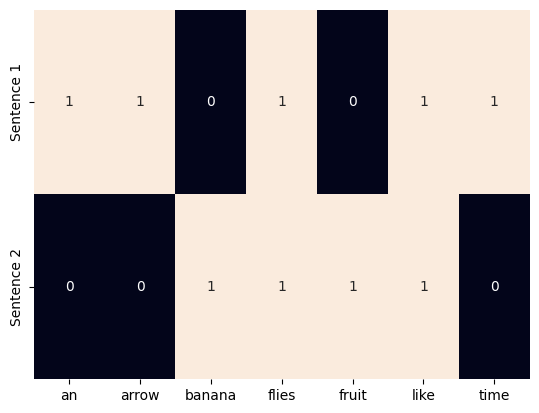

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
corpus=["Time flies like an arrow",
       "Fruit flies like a banana"]
one_hot_vectorizer=CountVectorizer(binary=True)
one_hot= one_hot_vectorizer.fit_transform(corpus).toarray()
vocab=one_hot_vectorizer.get_feature_names_out()
sns.heatmap(one_hot,annot=True,cbar=False,xticklabels=vocab,yticklabels=[f"Sentence {i+1}" for i in range(len(corpus))])

## The idf representation
> Imagine that you are analyzing a set of papers, may be, there are several words that are reapeted along them, such as "accuracy" or something like that. But words like VGG16 are not so common, and can indicate more value than those words that are quite repeated. So the IDF is a heurisitc that ´nealizes thpse words that are quite repeated
$$IDF(w)=\log \frac{N}{n_w}$$
> Where the N, si the total number of documents and the $n_w$ is the ammount of documents that contains certain word.
## TF-IDF
> It is just the multiplcation of $TF(w)IDF(w)$

<Axes: >

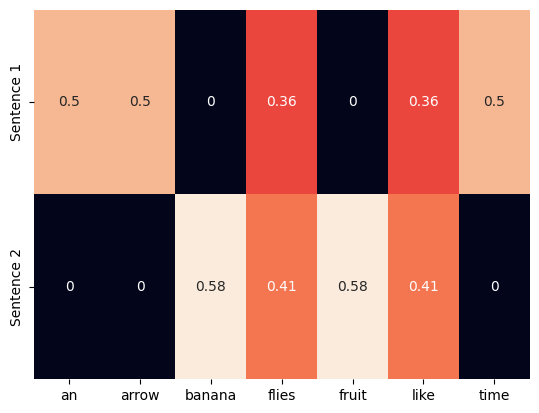

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
tfidf_vectorizer=TfidfVectorizer()
tfidf=tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf,annot=True,cbar=False,xticklabels=vocab,yticklabels=[f"Sentence {i+1}" for i in range(len(corpus))])

# Creating tensors with pytorch

In [3]:
def describe(x):
    """
    This is a helper function that prints in the console properties from a given tensor x
    """
    print(f"type {x.type()}")
    print(f"Shape/size: {x.shape}")
    print(f"Values: {x}") 
    

In [4]:
import torch
describe(torch.Tensor(2,3)) #Inicializa un tensor de dimensiones 2x3, es decir, una matriz de 2x3 en 0

type torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [5]:
describe(torch.rand(2,3))#Uniform random 

type torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[0.8775, 0.0273, 0.0305],
        [0.4330, 0.3938, 0.9365]])


In [6]:
describe(torch.randn(2,3)) #Normal random

type torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[-0.1501,  0.0597,  0.2114],
        [-0.2929,  1.8686, -0.1093]])


## Creating a filled tensor

In [13]:
describe(torch.zeros(2,2)) #Create a tensor filled of zeros with size 2x2
T=torch.ones(2,2) #Create a tensor filled of ones with size 2x2
describe(T)
T.fill_(4) #All functions with _, are inplace
describe(T)


type torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: tensor([[0., 0.],
        [0., 0.]])
type torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: tensor([[1., 1.],
        [1., 1.]])
type torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: tensor([[4., 4.],
        [4., 4.]])


## Creating a tensor from a list

In [17]:
x=torch.Tensor([[1,2,3],[2,3,4]])
describe(x)

type torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[1., 2., 3.],
        [2., 3., 4.]])


In [20]:
x=torch.Tensor([1])
describe(x)

type torch.FloatTensor
Shape/size: torch.Size([1])
Values: tensor([1.])


In [23]:
import numpy as np
npy=np.random.rand(2,3)
describe(torch.from_numpy(npy)) #Tensor from a numpy array

type torch.DoubleTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[0.3766, 0.7681, 0.9457],
        [0.4168, 0.3018, 0.0367]], dtype=torch.float64)


## Asigning data types to our tensor

In [27]:
x=torch.Tensor([[1,2,3],[4,5,6]])
describe(x)
x=x.long() #Lo convierte a tipo long
describe(x)

type torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[1., 2., 3.],
        [4., 5., 6.]])
type torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[1, 2, 3],
        [4, 5, 6]])


In [31]:
# Forma alternativa con dtype
x=torch.tensor([[1,2,3],[2,3,4]],dtype=torch.int64)
describe(x)
x=x.float()
describe(x)

type torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[1, 2, 3],
        [2, 3, 4]])
type torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[1., 2., 3.],
        [2., 3., 4.]])


# Operating with tensor

In [33]:
import torch
T_1=torch.randn(2,3)
T_1

tensor([[ 2.1324,  0.4220, -0.0414],
        [-1.2169, -1.0654,  1.8603]])

## Tensor sum

In [35]:
describe(torch.add(T_1,T_1))

type torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[ 4.2649,  0.8440, -0.0828],
        [-2.4339, -2.1308,  3.7207]])


In [36]:
describe(T_1+T_1)

type torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[ 4.2649,  0.8440, -0.0828],
        [-2.4339, -2.1308,  3.7207]])


## Dimension based operation

In [42]:
x=torch.arange(6) #Creates a tensor 1D of 6 size
describe(x)
x=x.view(2,3) #Transform the tensor 1D 6 size, to tensor 2D of 2 x 3
describe(x)

type torch.LongTensor
Shape/size: torch.Size([6])
Values: tensor([0, 1, 2, 3, 4, 5])
type torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[0, 1, 2],
        [3, 4, 5]])


In [50]:
describe(torch.sum(x,dim=0)) # suma por columnas 0+3,1+4,2+5
describe(torch.sum(x,dim=1)) # suma por filas 0+1+2,3+4+5
describe(torch.transpose(x,0,1)) #Transpone el tensor 2D

type torch.LongTensor
Shape/size: torch.Size([3])
Values: tensor([3, 5, 7])
type torch.LongTensor
Shape/size: torch.Size([2])
Values: tensor([ 3, 12])
type torch.LongTensor
Shape/size: torch.Size([3, 2])
Values: tensor([[0, 3],
        [1, 4],
        [2, 5]])


## Indexing and slicing

In [54]:
x=torch.arange(6).view(2,3)  #Creates a tensor 2 D of 2 x 3
describe(x)#normal
describe(x[:1,:2]) #es por fila y columna, por lo tanto, toma desde la fila 0 hasta la fila 0 y la columna 0 hasta la columna 1
describe(x[1,2]) #es por fila y columna, por lo tanto, toma el valor de 5


type torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[0, 1, 2],
        [3, 4, 5]])
type torch.LongTensor
Shape/size: torch.Size([1, 2])
Values: tensor([[0, 1]])
type torch.LongTensor
Shape/size: torch.Size([])
Values: 5


In [58]:
indices=torch.LongTensor([0,2])
describe(torch.index_select(x,dim=1,index=indices)) ##Agarra los elementos por fila dado al tensor de indicies
#el tensor de indices tiene 0,2 indicando que tomara los valores por fila con indice 0 y 2

type torch.LongTensor
Shape/size: torch.Size([2, 2])
Values: tensor([[0, 2],
        [3, 5]])


tensor([0, 2])

In [61]:
indices=torch.LongTensor([0,0])
describe(torch.index_select(x,dim=1,index=indices)) #agarralos elementos d eindices 0, al ser dos veces, lo repite

type torch.LongTensor
Shape/size: torch.Size([2, 2])
Values: tensor([[0, 0],
        [3, 3]])


In [62]:
indices=torch.LongTensor([0,0])
describe(torch.index_select(x,dim=0,index=indices))

type torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[0, 1, 2],
        [0, 1, 2]])


In [65]:
row_indices=torch.arange(2).long() #cREA UN TENSOR 1D, de 0 y 1
col_indices=torch.LongTensor([0,1])# Crea un tensor 1D de 0 y 1
describe(x[row_indices,col_indices]) #Accede a 0,4. ya que k son los elemento y accede de 0,0 y 1,1
#Se pueden unir tensores

type torch.LongTensor
Shape/size: torch.Size([2])
Values: tensor([0, 4])


In [71]:
x=torch.arange(6).view(2,3)
describe(x)
describe(torch.cat([x,x],dim=0)) #Añade cada elemento por columna

describe(torch.cat([x,x],dim=1)) #Añade cada elemento por fila

describe(torch.stack([x,x])) #Añade el tensor al inicio, haciendo un tensor 3D de 2 x 2 x 3

type torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[0, 1, 2],
        [3, 4, 5]])
type torch.LongTensor
Shape/size: torch.Size([4, 3])
Values: tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])
type torch.LongTensor
Shape/size: torch.Size([2, 6])
Values: tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])
type torch.LongTensor
Shape/size: torch.Size([2, 2, 3])
Values: tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


## Tensor algebra

In [79]:
x1=torch.arange(6).view(2,3)
describe(x1)
x2=torch.ones(3,2)
describe(x2)

type torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: tensor([[0, 1, 2],
        [3, 4, 5]])
type torch.FloatTensor
Shape/size: torch.Size([3, 2])
Values: tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [80]:
x2[:,1]+=1
describe(x2)

type torch.FloatTensor
Shape/size: torch.Size([3, 2])
Values: tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


In [82]:
describe(torch.mm(x1.float(),x2)) #Multiplicacion matricial

type torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: tensor([[ 3.,  6.],
        [12., 24.]])


# Tensors and computational graphs

In [91]:
x=torch.ones(2,2,requires_grad=True)
describe(x)
print(x.grad is None)

type torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [92]:
y=(x+2)*(x+5)+3
describe(y)
print(x.grad is None)

type torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [93]:
z=y.mean()
describe(z)
z.backward()
print(x.grad is None)

type torch.FloatTensor
Shape/size: torch.Size([])
Values: 21.0
False


In [94]:
torch.cuda.is_available()

True

In [96]:
device=torch.device("cuda" if torch.cuda.is_available else "cpu")
device

device(type='cuda')

In [97]:
x=torch.rand(3,3).to(device)
describe(x)

type torch.cuda.FloatTensor
Shape/size: torch.Size([3, 3])
Values: tensor([[0.7699, 0.6945, 0.5483],
        [0.2604, 0.2907, 0.5637],
        [0.2702, 0.9864, 0.0228]], device='cuda:0')


In [98]:
y=torch.rand(3,3)
x+y


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [99]:
cpu_device=torch.device("cpu")
y=y.to(cpu_device)
x=x.to(cpu_device)
x+y

tensor([[0.8587, 1.1708, 0.8323],
        [0.8997, 0.3340, 0.9847],
        [1.0876, 1.1313, 0.9215]])

# Exercise

> Crea un tensor de 2 dimensiones y añada una dimension de tamaño 1 en la dimensión 0

In [109]:
t=torch.rand(2,2)
t=t.unsqueeze(0)
describe(t)

type torch.FloatTensor
Shape/size: torch.Size([1, 2, 2])
Values: tensor([[[0.3828, 0.0351],
         [0.6456, 0.3332]]])


> Remuve la dimension extra que añadiste la tensor

In [111]:
t=t.squeeze(0)
describe(t)

type torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: tensor([[0.3828, 0.0351],
        [0.6456, 0.3332]])


> Crae un tensor aleaotrio de tamaño 5x3 en el intervalo [3,7)

In [127]:
tensor=3+torch.rand(5,3)*(7-3) #Distribucion uniforme tramsformada de 3 a 7
tensor


tensor([[5.0664, 3.7909, 4.6552],
        [6.6318, 6.1038, 6.6629],
        [3.2889, 5.9677, 6.9861],
        [3.3222, 6.6602, 5.9558],
        [4.4902, 3.0069, 3.0068]])

> Crea un tensor con valores de una distribuion noraml

In [132]:
tensor=torch.randn(3,3)
describe(tensor)

type torch.FloatTensor
Shape/size: torch.Size([3, 3])
Values: tensor([[ 0.9089, -0.8299, -0.7522],
        [ 0.8087,  0.8473, -0.6400],
        [-0.0757, -0.3553,  0.1509]])


> Recupera los indeices de todos los elementos no ceros en un ternosr

In [133]:
a=torch.Tensor([1,1,1,0,1])
a.nonzero()

tensor([[0],
        [1],
        [2],
        [4]])

> Crea un tensor de tamaño 3,1 y añade horizontalmente un stack de cuatro copias

In [138]:
a=torch.rand(3,1)
a1=a.expand(3,4) #añade 4 stacks identicos de tamaño de filas 3, dando un tamaño de 3,4
describe(a)
describe(a1)


type torch.FloatTensor
Shape/size: torch.Size([3, 1])
Values: tensor([[0.9550],
        [0.2069],
        [0.9320]])
type torch.FloatTensor
Shape/size: torch.Size([3, 4])
Values: tensor([[0.9550, 0.9550, 0.9550, 0.9550],
        [0.2069, 0.2069, 0.2069, 0.2069],
        [0.9320, 0.9320, 0.9320, 0.9320]])


> Retorna el match matrix-matix producto de dos tres dimensiones 

In [139]:
a=torch.rand(3,4,5)
b=torch.rand(3,5,4)
c=torch.bmm(a,b) #el shape será de 3,4,4
describe(c)

type torch.FloatTensor
Shape/size: torch.Size([3, 4, 4])
Values: tensor([[[1.4583, 1.5904, 0.4026, 0.9961],
         [1.1033, 0.8310, 0.4040, 0.8625],
         [1.6003, 1.7621, 0.4923, 1.0356],
         [1.0674, 1.4407, 0.2987, 1.1105]],

        [[0.5656, 2.0457, 1.3075, 0.6108],
         [0.5989, 2.1329, 1.2697, 1.1373],
         [0.9230, 3.1848, 1.9721, 1.4247],
         [0.4269, 1.7657, 1.2376, 0.6673]],

        [[0.1061, 0.9845, 0.5408, 1.4903],
         [0.3872, 1.8258, 0.9005, 2.3799],
         [0.3417, 1.6308, 0.8693, 1.9593],
         [0.2268, 1.0817, 0.4835, 1.3933]]])


> Retorna el producto de batch matrix matri de una matriz de 3 dimensiones y una de 2 dimensiones 


In [164]:
a=torch.rand(3,4,5)
b=torch.rand(5,4)

> En este,no voy a poder hacer la mutliplicacion directa, por que hay que recordar algo
El batch es el primer numero de shape b, los demas, son dimensiones.
    Por lo que a nuestra operacion, le faltara el batch de 3 a nuestra matriz B
Vamos en este caso a generarlo, primero,vamos a añadir una dimensión
>
> Despues, vamos a añadirle los valores, ya que no tiene, entonces expandimos en base a lo que tenga el batch de a

In [161]:
b=b.unsqueeze(0)
describe(b)

type torch.FloatTensor
Shape/size: torch.Size([1, 5, 4])
Values: tensor([[[0.2859, 0.1375, 0.4277, 0.1005],
         [0.5881, 0.0710, 0.8921, 0.4731],
         [0.3821, 0.9433, 0.9507, 0.8388],
         [0.3231, 0.8729, 0.1427, 0.1633],
         [0.4512, 0.8640, 0.1819, 0.0666]]])


In [162]:
b.expand(a.size(0),*b.size()).shape

torch.Size([3, 1, 5, 4])

Esto hay que hacerlo en una unica operacion

In [165]:
b_1=b.unsqueeze(0).expand(a.size(0),*b.size())
b_1.shape

torch.Size([3, 5, 4])

In [166]:
#La multiplicacion es entonces
C=torch.bmm(a,b.unsqueeze(0).expand(a.size(0),*b.size()))
describe(C)

type torch.FloatTensor
Shape/size: torch.Size([3, 4, 4])
Values: tensor([[[0.9327, 0.2483, 0.6885, 0.6906],
         [1.4276, 0.3786, 1.2853, 0.9366],
         [0.8369, 0.3271, 0.8362, 0.3882],
         [1.8585, 0.7872, 1.4164, 1.2942]],

        [[1.9078, 0.6070, 1.7669, 1.3545],
         [0.8878, 0.4208, 0.3370, 0.4956],
         [1.6064, 0.8646, 1.8875, 1.4067],
         [0.6575, 0.4348, 0.6387, 0.5051]],

        [[1.6846, 0.8331, 1.8265, 1.4215],
         [0.9953, 0.3185, 1.0423, 1.0533],
         [0.9370, 0.3129, 1.3568, 0.6105],
         [2.1031, 0.7815, 1.7071, 1.2082]]])
